In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from pmdarima import ARIMA

import os
import seaborn as sns

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="darkgrid")

# Stage 1

Stage 1 of the model aims to forecast the Feds Funds Rate through two parallel approaches 

1. ARMA(1,0) model which takes historical data of FFR to forecast future values. 

2. ARMAX(1,0) model which uses uses historical data FFR values and the percent deviation of Nominal GDP from Potential GDP to forecast FFR. The motivation is that the Feds use FFR as a tool to regulate GDP and push it close to the Potential GDP. 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarni

                              ARMA Model Results                              
Dep. Variable:                    FFR   No. Observations:                  135
Model:                     ARMA(1, 0)   Log Likelihood                 100.523
Method:                       css-mle   S.D. of innovations              0.113
Date:                Fri, 18 Sep 2020   AIC                           -195.046
Time:                        01:52:25   BIC                           -186.330
Sample:                             0   HQIC                          -191.504
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3657      0.462      0.792      0.428      -0.539       1.270
ar.L1.FFR      0.9846      0.011     88.244      0.000       0.963       1.006
                                    Roots           

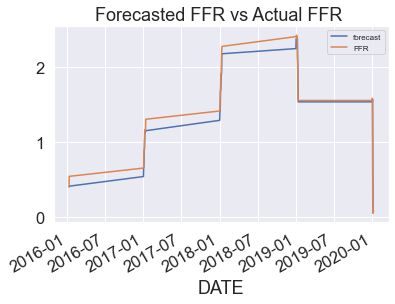

Mean Squared Error =  0.0375197587282732
Mean Absolute Error =  0.11002161954099295


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


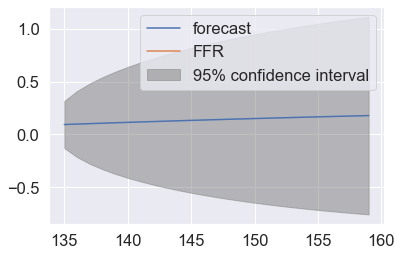

In [2]:
'''


Approach #1:

This approach uses a univariate ARMA (1,0) model that is trained using monthly FFR values from 2000-2020. The goal 
is to verify whether a purely statistical model can capture the policies that were employed to act in response to 
the Financial Crisis of 2007-2009, and help forecast FFR movements in the 2020 economic recession due to the 
CoronaVirus Pandemic. 


'''

#Importing Data
df_1 = pd.read_csv (r'/Users/syedhadi/Desktop/FFR_aug.csv', parse_dates=['DATE'], index_col=['DATE'])
FFR = df_1['FFR'].dropna()

# Importing the ARMA 
from statsmodels.tsa.arima_model import ARMA

# Training Forecast Model with FFR Data using ARMA(1,0)
model_1 = ARMA(FFR, order=(1,0))
ffr_pred_endog = model_1.fit()
print(ffr_pred_endog.summary())

# Plot the original series and the forecasted series
ffr_pred_endog.plot_predict(start=90, end=134)
plt.legend(fontsize=8)
plt.title('Forecasted FFR vs Actual FFR ')
plt.savefig('ffr forecast')
plt.show()


#Calculating Accuracy 
from sklearn import metrics
acc_1_pred = ffr_pred_endog.predict(start=90, end=134)
acc_1_true = FFR[-len(acc_1_pred):]
print('Mean Squared Error = ' , metrics.mean_squared_error(acc_1_true , acc_1_pred))
print('Mean Absolute Error = ' , metrics.mean_absolute_error(acc_1_true , acc_1_pred))


#Forecasting Future Values for 24 Months 
ffr_pred_endog.plot_predict(start=135 , end=159, dynamic= True)
ffr_forecast_endog = np.array(ffr_pred_endog.predict(start=135, end=158))
ffr_forecast_endog = ffr_forecast_endog.reshape(-1,1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarni

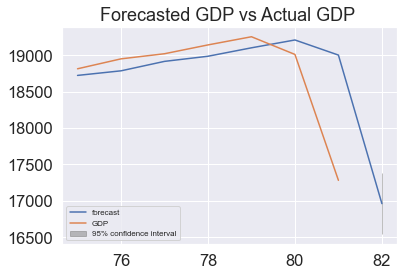

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarni

FFR Forecast w/ Exogenous Variable 
                               ARMA Model Results                              
Dep. Variable:                    FFR   No. Observations:                   82
Model:                     ARMA(1, 1)   Log Likelihood                 -28.482
Method:                       css-mle   S.D. of innovations              0.335
Date:                Wed, 16 Sep 2020   AIC                             66.963
Time:                        02:50:12   BIC                             78.997
Sample:                             0   HQIC                            71.795
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6665      1.297      2.055      0.040       0.124       5.209
x1            -0.1498      0.031     -4.773      0.000      -0.211      -0.088
ar.L1.FFR      

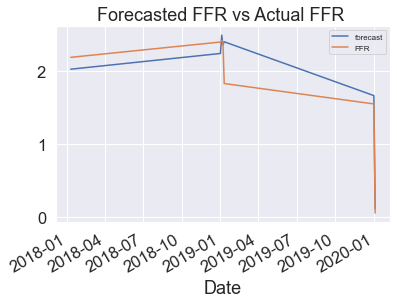

Mean Squared Error =  0.057772070254477524
Mean Absolute Error =  0.16921465898088378

 
 
 
 



In [79]:
'''

Approach #2:

This approach uses a multivariate ARMAX (1,0) model that is trained using Quarterly FFR values from 2000-2020 and uses
the percentage deviation of Nominal GDP from Potential GDP as an exogenous variable. The motivation is that the Fed 
uses FFR as a tool to regulate the Nominal GDP and bring it close to Potential GDP. This approach helps verify if 
using an exogenous variable to capture the policy aspect impacting the FFR movements alongside a statistical 
approach outperforms a purely statistical model. 

Data from the Financial Crisis of 2007-2009 is used here also and verified on the CoronaVirus Pandemic recession.

An ARMAX(1,0) moddel is first used to forecast Nominal GDP values. The %age difference of this forecasted data from 
the US Target GDP (provided the Federal Reserve) will then be used as exogenous regressor in the ARMAX(1,0) model used 
to finally forecast FFR.

'''


#Importing Data
df_2 = pd.read_csv (r'/Users/syedhadi/Desktop/GDP.csv',parse_dates=['Date'], index_col=['Date'])
FFR_2 = df_2['FFR'].dropna()
GDP = df_2['GDP'].dropna()
GDPP = df_2['GDPPOT'].dropna()

#Preparing Exogenous Variable by Getting Percentage Deviation from Nominal GDP and Potential GDP
exog_gdpp_in = GDPP[:len(GDP)]
exog_gdpp_out = GDPP[82:90]



# Importing the ARMA 
from statsmodels.tsa.arima_model import ARMA

# Training Forecast Model with Nominal GDP Data using ARMAX(1,0)
model_2 = ARMA(GDP, order=(1,0), exog = exog_gdpp_in)
gdp_pred = model_2.fit()
#print('GDP Forecast w/ Exogenous Variable \n',gdp_pred.summary())

# Plot the original series and the forecasted series
#gdp_pred.plot_predict(start=75, end=82, exog = exog_gdpp_out)
gdp_pred.plot_predict(start=75, end=82, exog = GDPP[75:82])
plt.legend(fontsize=8)
plt.title('Forecasted GDP vs Actual GDP ')
plt.savefig('gdp exog forecast')
plt.show()



#Forecasting FFR with Exogenous Variable (%age Deviation of GDP and Target GDP)

diff_in = ((np.abs(exog_gdpp_in-GDP))/exog_gdpp_in)*100 #exogenous when Training FFR Forecast Model  
#diff_out = ((np.abs(exog_gdpp_out - (gdp_pred.predict(start=82, end=89, exog = exog_gdpp_out ))))/exog_gdpp_out)*100

# Training Forecast Model with FFR Data and Exog Var using ARMAX(1,0)
model_3 = ARMA(FFR_2, order=(1,1), exog = diff_in)
ffr_pred_exog = model_3.fit()
print('FFR Forecast w/ Exogenous Variable \n',ffr_pred_exog.summary())


# Plot the original series and the forecasted series
ffr_pred_exog.plot_predict(start=75, end=81, exog = diff_in[-7:])
plt.legend(fontsize=8)
plt.title('Forecasted FFR vs Actual FFR ')
plt.savefig('FFR exog')
plt.show()


#Calculating Accuracy 
from sklearn import metrics
acc_2_pred = ffr_pred_exog.predict(start=75, end=81, exog = diff_in[-7:])
acc_2_true = FFR_2[-len(acc_2_pred):]
print('Mean Squared Error = ' , metrics.mean_squared_error(acc_2_true , acc_2_pred))
print('Mean Absolute Error = ' , metrics.mean_absolute_error(acc_2_true , acc_2_pred))
print('\n \n \n \n \n')


In [80]:
len(df_2['FFR'].dropna())

82






Observations from Stage 1

It has been observed that a univariate ARMA model outperforms the multivariate ARMAX model. A possiible explanation is 
that the multivariate model uses the Nominal GDP data which is only available in quarterly periods. This reduces the 
number of training points compared the univariate model which uses monthly FFR values for training. 

However, we will choose to proceed with stage 2 using forecast results from the univariate approach which gives a 
lower mean square error value. 











# Stage 2

The goal of Stage 2 is to use the forecasted FFR values from Stage 1 and using a KNN Classifier, predict the 3M Libor
values. The classifier is trained using 3M Libor data and FFR data from 2004-2020.

In [81]:
#Importing libraries
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

In [82]:
#Getting the Data
df_3 = pd.read_csv (r'/Users/syedhadi/Desktop/combinedU.csv', parse_dates=['Date'], index_col=['Date'])
df_3.dropna(inplace=True)
print(df_3.head())

            3M Libor  FEDFUNDS
Date                          
2004-02-01      1.15      1.01
2004-05-01      1.15      0.97
2004-06-01      1.15      0.92
2004-07-01      1.14      0.94
2004-08-01      1.14      0.99


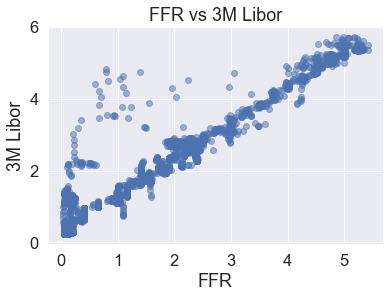

Correlation Raw Data =  0.9789372462247646


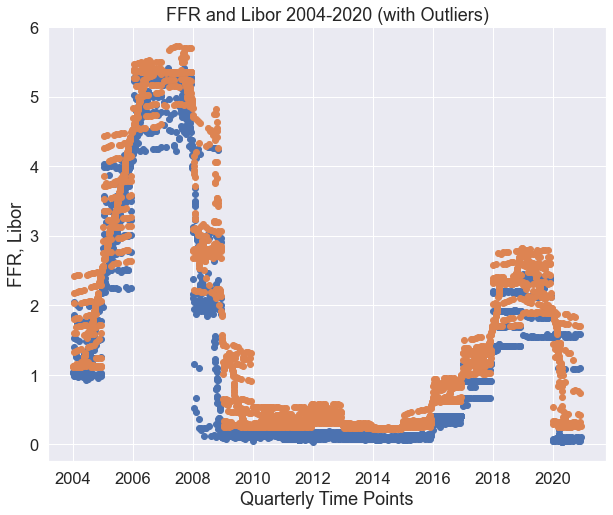

In [83]:
#plot
X = df_3["FEDFUNDS"]
Y = df_3["3M Libor"]
plt.scatter(X, Y, alpha=0.5)
plt.title('FFR vs 3M Libor')
plt.xlabel('FFR')
plt.ylabel('3M Libor')
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X.index, X)
ax.scatter(Y.index, Y)
ax.set(xlabel = 'Quarterly Time Points', ylabel = 'FFR, Libor', title='FFR and Libor 2004-2020 (with Outliers)')


corr = X.corr(Y)
print("Correlation Raw Data = ", corr)

This correlation can be improved by cleaning this data to removing anomalies. 

Correlation Cleaned Data =  0.9789372462247646


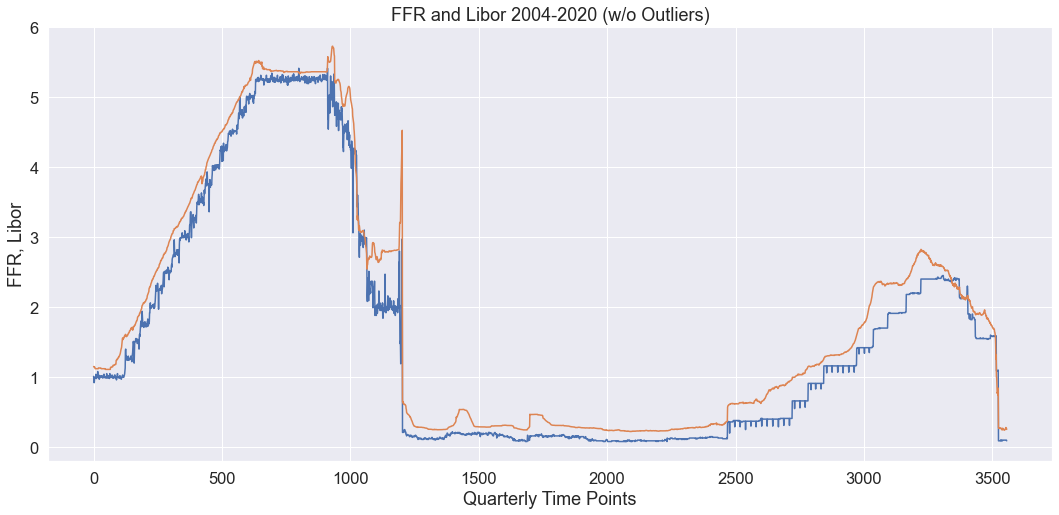

In [84]:
#Cleaning the Data
xval = np.array(X)
yval = np.array(Y)
d = list()
x= list()
y= list()

for i in range (xval.size):
    d.append(np.abs((yval[i]-xval[i])/yval[i])*100)

outlier = np.percentile(d, 85)

for i in range (xval.size):
    if d[i] < outlier:
        x.append(xval[i])
        y.append(yval[i])
        
x = np.array(x)
y = np.array(y)
fig, ax = plt.subplots(figsize=(18, 8))
#ax.scatter(x, y, alpha=0.5)
#ax.set(title = ('FFR vs 3M Libor' ), xlabel = ('FFR'), ylabel = ('3M Libor'))
#fig.show()
#fig.savefig('Libor FFR Corr')


#fig, ax = plt.subplots(figsize=(10, 8))
#ax.scatter(x.index, x)
#ax.scatter(y.index, y)
#ax.set(xlabel = 'Quarterly Time Points', ylabel = 'FFR, Libor', title='FFR and Libor 2004-2020 (w/o Outliers)')

plt.plot(x)
plt.plot(y)
plt.xlabel('Quarterly Time Points')
plt.ylabel('FFR, Libor')
plt.title('FFR and Libor 2004-2020 (w/o Outliers)')
plt.savefig('FFR Libor')
#plt.show()

corr = X.corr(Y)
print("Correlation Cleaned Data = ", corr)

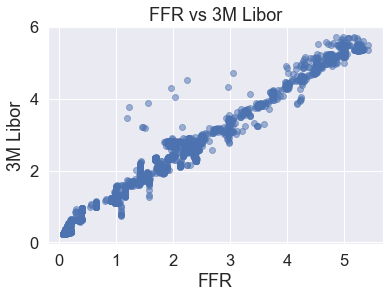

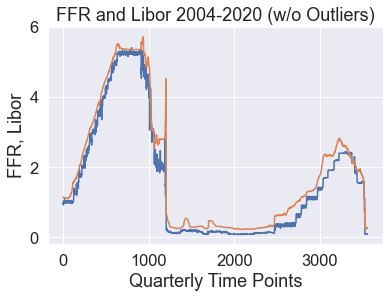

Correlation Cleaned Data =  0.9789372462247646


In [85]:
#Cleaning the Data
xval = np.array(X)
yval = np.array(Y)
d = list()
x= list()
y= list()

for i in range (xval.size):
    d.append(np.abs((yval[i]-xval[i])/yval[i])*100)

outlier = np.percentile(d, 85)

for i in range (xval.size):
    if d[i] < outlier:
        x.append(xval[i])
        y.append(yval[i])
        
x = np.array(x)
y = np.array(y)
plt.scatter(x, y, alpha=0.5)
plt.title('FFR vs 3M Libor')
plt.xlabel('FFR')
plt.ylabel('3M Libor')
plt.show()


#fig, ax = plt.subplots(figsize=(10, 8))
#ax.scatter(x.index, x)
#ax.scatter(y.index, y)
#ax.set(xlabel = 'Quarterly Time Points', ylabel = 'FFR, Libor', title='FFR and Libor 2004-2020 (w/o Outliers)')

plt.plot(x)
plt.plot(y)
plt.xlabel('Quarterly Time Points')
plt.ylabel('FFR, Libor')
plt.title('FFR and Libor 2004-2020 (w/o Outliers)')
plt.show()

corr = X.corr(Y)
print("Correlation Cleaned Data = ", corr)

<ipython-input-86-cc72a8717995>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


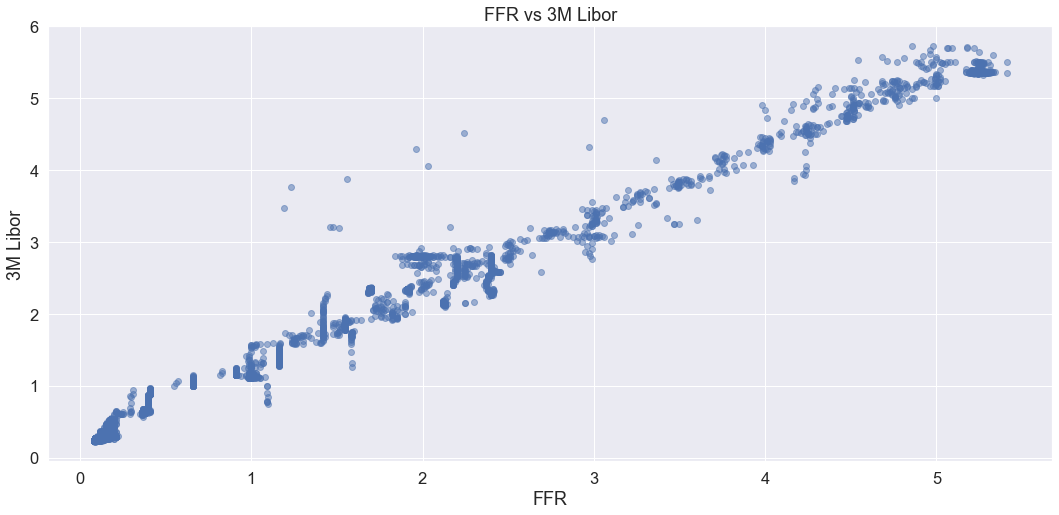

In [86]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.scatter(x, y, alpha=0.5)
ax.set(title = ('FFR vs 3M Libor' ), xlabel = ('FFR'), ylabel = ('3M Libor'))
fig.show()
fig.savefig('Libor FFR Corr')

             Classifier Results of KNN 
 
 
[[390   3   0   0   0   0]
 [ 43 104   0   0   0   0]
 [  0  61 101   0   0   0]
 [  0   3  12  34   1   0]
 [  0   0   0  14  39   0]
 [  0   0   0   0  19  66]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       393
           1       0.61      0.71      0.65       147
           2       0.89      0.62      0.73       162
           3       0.71      0.68      0.69        50
           4       0.66      0.74      0.70        53
           5       1.00      0.78      0.87        85

    accuracy                           0.82       890
   macro avg       0.80      0.75      0.77       890
weighted avg       0.84      0.82      0.82       890



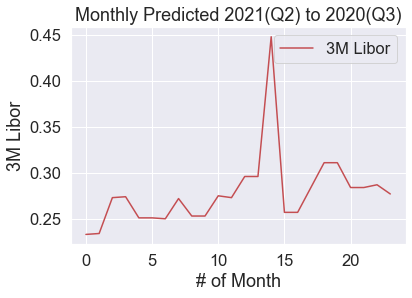

In [88]:
#Building KNN Classifier

#Train Test Split 
x=x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=25)


#Scaling the Data for for Testing Accuracy
X_train1 = (X_train).astype(int)
X_test1 = (X_test).astype(int)
y_train1 = (y_train).astype(int)
y_test1 = (y_test).astype(int)

#Training the Classifier for Testing Accuracy
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier1.fit(X_train1, y_train1)

#Testing Results 
y_pred1 = classifier1.predict(X_test1)

from sklearn.metrics import classification_report, confusion_matrix
print('             Classifier Results of KNN \n \n ')
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))


#Scaling the Data for Predicting 3M Libor
X_train = (X_train*1000).astype(int)
X_test = (X_test*1000).astype(int)
y_train = (y_train*1000).astype(int)
y_test = (y_test*1000).astype(int)

#Training the Classifier for Predicting 3M Libor
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

libor_knn = ((classifier.predict(ffr_forecast_endog*1000)))/1000
plt.plot(libor_knn,'r' ,label = '3M Libor')
plt.title('Monthly Predicted 2021(Q2) to 2020(Q3)')
plt.xlabel('# of Month')
plt.ylabel('3M Libor')
plt.legend()
plt.savefig('libor knn')

In [40]:
np.savetxt("output libor.csv", libor_knn, delimiter=",")
np.savetxt("output ffr.csv", ffr_forecast_endog, delimiter=",")

In [41]:
df_4 = pd.read_csv (r'/Users/syedhadi/Desktop/Model Output.csv', parse_dates=['DATE'], index_col=['DATE'])

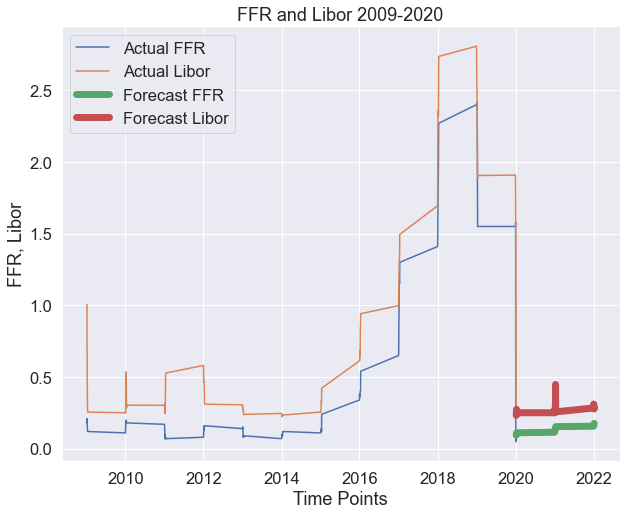

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df_4['FFR'][:135], label = 'Actual FFR')
ax.plot(df_4['3M Libor'][:135], label = 'Actual Libor')
ax.plot(df_4['FFR'][135:], label ='Forecast FFR', linewidth=7.0 )
ax.plot(df_4['3M Libor'][135:], label ='Forecast Libor', linewidth=7.0  )
ax.set(xlabel = 'Time Points', ylabel = 'FFR, Libor', title='FFR and Libor 2009-2020')
ax.legend()

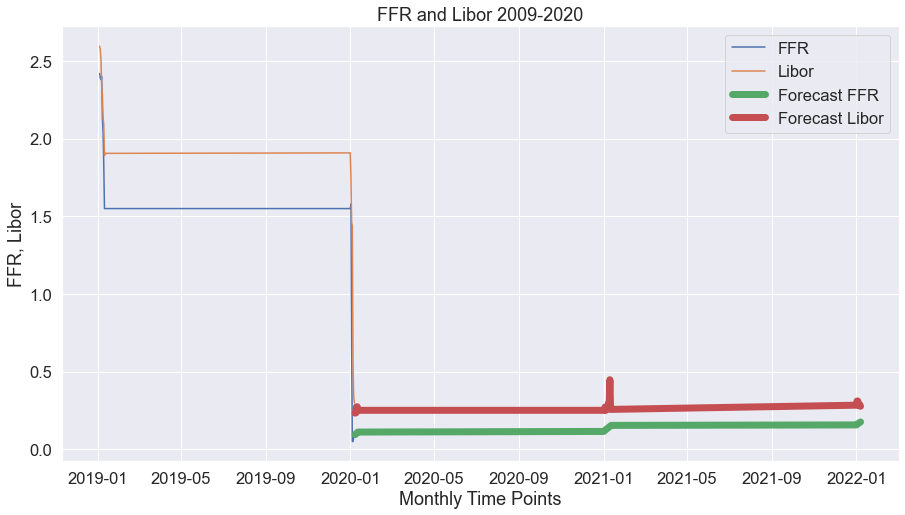

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df_4['FFR'][119:135], label= 'FFR')
ax.plot(df_4['3M Libor'][119:135], label= 'Libor')
ax.plot(df_4['FFR'][-24:], label ='Forecast FFR', linewidth=7.0 )
ax.plot(df_4['3M Libor'][-24:], label ='Forecast Libor', linewidth=7.0  )
ax.set(xlabel = 'Monthly Time Points', ylabel = 'FFR, Libor', title='FFR and Libor 2009-2020')
ax.legend()

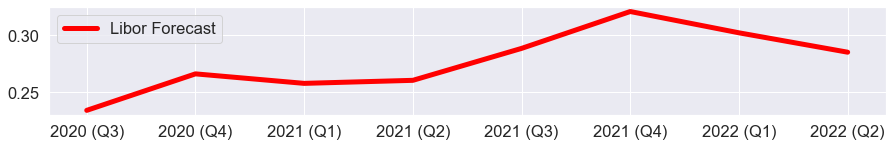

In [44]:
df_5 = pd.read_csv (r'/Users/syedhadi/Desktop/Libor Forecast.csv', parse_dates=['Quarters'], index_col=['Quarters'])
fig, ax = plt.subplots(figsize=(15, 2))
ax.plot(df_5['Libor'], label= 'Libor Forecast', color = 'red', linewidth = 5.0)
ax.legend()

In [45]:
len(X_train)

2667

In [46]:
len(ffr_forecast_endog)

24

In [47]:
len(libor_knn)

24

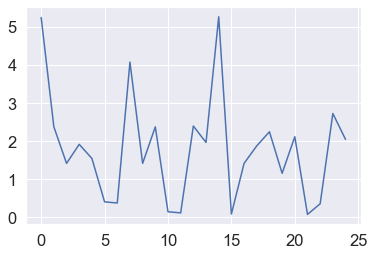

In [59]:
plt.plot(X_train[-25:]/1000)

In [77]:
ffr_forecast_endog

array([[0.09424861],
       [0.09843175],
       [0.10255044],
       [0.10660567],
       [0.11059841],
       [0.11452962],
       [0.11840026],
       [0.12221126],
       [0.12596354],
       [0.129658  ],
       [0.13329553],
       [0.13687702],
       [0.14040331],
       [0.14387528],
       [0.14729374],
       [0.15065953],
       [0.15397346],
       [0.15723632],
       [0.16044891],
       [0.163612  ],
       [0.16672634],
       [0.1697927 ],
       [0.17281181],
       [0.1757844 ],
       [0.17871119]])